In [7]:
import finesse
finesse.configure(plotting=True)

kat = finesse.Model()
kat.parse(
    """
    # Optical setup: laser, space and mirror:
    l l1 P=2
    s s1 l1.p1 m1.p1
    m m1 R=1 T=0

    # Define a pendulum for our mirror, with a z-motion resonance at 10Hz
    # and Q factor of 1000
    pendulum sus1 m1.mech mass=1 fz=20 Qz=1000

    # Measure the mirror's longitudinal motion
    xd m1_z m1.mech.z

    pd refl m1.p1.o

    # Set a signal frequency to activate the signal simulation
    # (needed for radiation pressure effects to be observed)
    fsig(1)

    # Generate amplitude modulation at the laser
    sgen sig l1.amp
    """
)

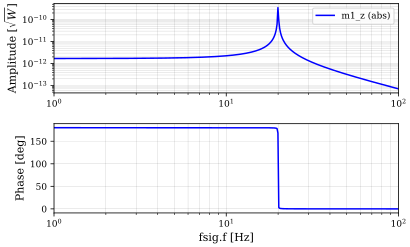

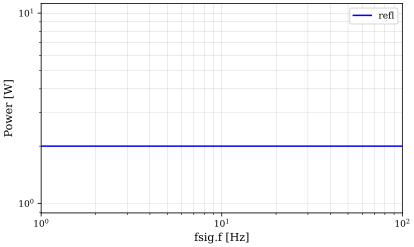

In [8]:
# Sweep the frequency of the amplitude modulation
out = kat.run("xaxis(fsig.f, log, 1, 100, 400)")
out.plot(log=True);